In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.concat([pd.read_csv('train.csv'), pd.read_csv('test.csv')])
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB
None


In [3]:
print(df.head())

    Age Cabin Embarked     Fare  \
0  22.0   NaN        S   7.2500   
1  38.0   C85        C  71.2833   
2  26.0   NaN        S   7.9250   
3  35.0  C123        S  53.1000   
4  35.0   NaN        S   8.0500   

                                                Name  Parch  PassengerId  \
0                            Braund, Mr. Owen Harris      0            1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...      0            2   
2                             Heikkinen, Miss. Laina      0            3   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)      0            4   
4                           Allen, Mr. William Henry      0            5   

   Pclass     Sex  SibSp  Survived            Ticket  
0       3    male      1       0.0         A/5 21171  
1       1  female      1       1.0          PC 17599  
2       3  female      0       1.0  STON/O2. 3101282  
3       1  female      1       1.0            113803  
4       3    male      0       0.0            373450  


In [4]:
print(df.describe())

               Age         Fare        Parch  PassengerId       Pclass  \
count  1046.000000  1308.000000  1309.000000  1309.000000  1309.000000   
mean     29.881138    33.295479     0.385027   655.000000     2.294882   
std      14.413493    51.758668     0.865560   378.020061     0.837836   
min       0.170000     0.000000     0.000000     1.000000     1.000000   
25%      21.000000     7.895800     0.000000   328.000000     2.000000   
50%      28.000000    14.454200     0.000000   655.000000     3.000000   
75%      39.000000    31.275000     0.000000   982.000000     3.000000   
max      80.000000   512.329200     9.000000  1309.000000     3.000000   

             SibSp    Survived  
count  1309.000000  891.000000  
mean      0.498854    0.383838  
std       1.041658    0.486592  
min       0.000000    0.000000  
25%       0.000000    0.000000  
50%       0.000000    0.000000  
75%       1.000000    1.000000  
max       8.000000    1.000000  


Sex
female    233
male      109
Name: Survived, dtype: int64


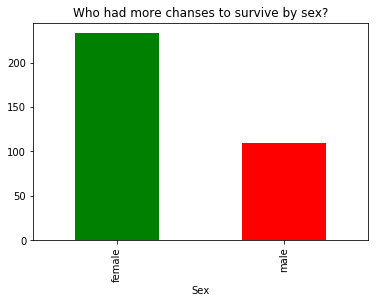

In [5]:
survived_sex = df[df.Survived == 1]
survived_sex = survived_sex.groupby('Sex')['Survived'].count()
survived_sex.plot(kind='bar', 
                  color=['green', 'red'],
                  title='Who had more chanses to survive by sex?')
print(survived_sex)

Pclass
1    136
3    119
2     87
Name: Survived, dtype: int64


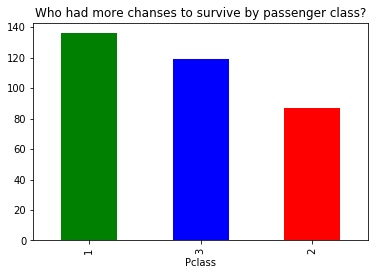

In [6]:
survived_pclass = df[df.Survived == 1]
survived_pclass = survived_pclass.groupby('Pclass')['Survived'].count().sort_values(ascending=False)
survived_pclass.plot(kind='bar', color=['green', 'blue', 'red'],
                     title='Who had more chanses to survive by passenger class?')
print(survived_pclass)

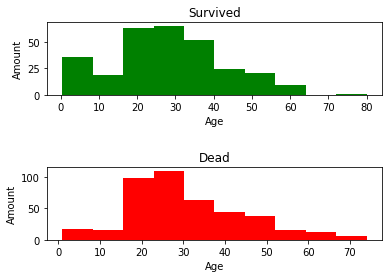

In [7]:
survived = df[df["Survived"] == 1]["Age"].dropna()
perished = df[df["Survived"] == 0]["Age"].dropna()

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
fig.subplots_adjust(hspace=1)
ax1.hist(survived, facecolor='green')
ax1.set_title("Survived")
ax1.set_xlabel("Age")
ax1.set_ylabel("Amount")
ax2.hist(perished, facecolor='red')
ax2.set_title("Dead")
ax2.set_xlabel("Age")
ax2.set_ylabel("Amount")

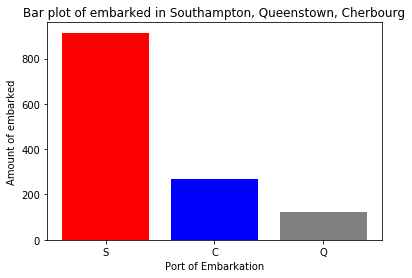

In [8]:
non_empty_embarked = df["Embarked"].dropna()
unique_values, value_counts = non_empty_embarked.unique(), non_empty_embarked.value_counts()
X = range(len(unique_values))
colors = ["red", "blue", "grey"]

plt.bar(left=X,
        height=value_counts,
        color=colors,
        tick_label=unique_values)
plt.xlabel("Port of Embarkation")
plt.ylabel("Amount of embarked")
plt.title("Bar plot of embarked in Southampton, Queenstown, Cherbourg")

In [9]:
df["Embarked"].fillna("S", inplace=True)
df["Age"].fillna(df["Age"].median(), inplace=True)
df["Fare"].fillna(df["Fare"].median(), inplace=True)

In [10]:
print(df.head())

    Age Cabin Embarked     Fare  \
0  22.0   NaN        S   7.2500   
1  38.0   C85        C  71.2833   
2  26.0   NaN        S   7.9250   
3  35.0  C123        S  53.1000   
4  35.0   NaN        S   8.0500   

                                                Name  Parch  PassengerId  \
0                            Braund, Mr. Owen Harris      0            1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...      0            2   
2                             Heikkinen, Miss. Laina      0            3   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)      0            4   
4                           Allen, Mr. William Henry      0            5   

   Pclass     Sex  SibSp  Survived            Ticket  
0       3    male      1       0.0         A/5 21171  
1       1  female      1       1.0          PC 17599  
2       3  female      0       1.0  STON/O2. 3101282  
3       1  female      1       1.0            113803  
4       3    male      0       0.0            373450  


In [11]:
def get_dummie_sex(df):
    """Convert to binar number of sex categories"""
    
    df_dummie = pd.get_dummies(df['Sex'][:], prefix="sex")
    df_dummie = pd.concat([df[:],df_dummie[:]], axis=1)
    
    return (df_dummie)

In [12]:
x = df.loc[:,:]
df = get_dummie_sex(x)
df.drop('Sex', axis=1, inplace=True)

In [13]:
def get_dummie_pclass(df):
    """Convert to binar number of Pclass categories"""
    
    df_dummie = pd.get_dummies(df['Pclass'][:], prefix="pclass")
    df_dummie = pd.concat([df[:],df_dummie[:]], axis=1)
    
    return (df_dummie)

In [14]:
x = df.loc[:,:]
df = get_dummie_pclass(x)
df.drop('Pclass', axis=1, inplace=True)

family_size
4     0.724138
3     0.578431
2     0.552795
7     0.333333
1     0.303538
5     0.200000
6     0.136364
11    0.000000
8     0.000000
Name: Survived, dtype: float64


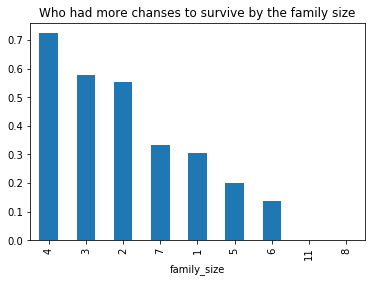

In [15]:
df['family_size'] = df['SibSp'] + df['Parch'] + 1
family_size = df.groupby('family_size')['Survived'].mean().sort_values(ascending=False)
print(family_size)
family_size.plot(kind='bar', title='Who had more chanses to survive by the family size')

In [16]:
df.drop(['SibSp','Parch'], axis=1, inplace=True)

In [17]:
df['is_alone'] = 0
df.loc[df['family_size'] == 1, 'is_alone'] = 1

In [18]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 15 columns):
Age            1309 non-null float64
Cabin          295 non-null object
Embarked       1309 non-null object
Fare           1309 non-null float64
Name           1309 non-null object
PassengerId    1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
sex_female     1309 non-null uint8
sex_male       1309 non-null uint8
pclass_1       1309 non-null uint8
pclass_2       1309 non-null uint8
pclass_3       1309 non-null uint8
family_size    1309 non-null int64
is_alone       1309 non-null int64
dtypes: float64(3), int64(3), object(4), uint8(5)
memory usage: 118.9+ KB
None


In [19]:
def get_dummie_embarked(df):
    """Convert to binar number of Embarked categories"""
    
    df_dummie = pd.get_dummies(df['Embarked'][:], prefix="embarked")
    df_dummie = pd.concat([df[:],df_dummie[:]], axis=1)
    
    return (df_dummie)

In [20]:
x = df.loc[:,:]
df = get_dummie_embarked(x)
df.drop('Embarked', axis=1, inplace=True)

In [21]:
len(df.Age.value_counts())

98

In [22]:
df.Age = df.Age.values.astype(int)

In [23]:
len(df.Age.value_counts())

73

In [24]:
def get_dummie_age(df):
    """Convert to binar number of Age categories"""
    df.Age = df.Age.values.astype(str)
    df_dummie = pd.get_dummies(df['Age'][:], prefix="age")
    df_dummie = pd.concat([df[:],df_dummie[:]], axis=1)
    
    return (df_dummie)

In [25]:
x = df.loc[:,:]
df = get_dummie_age(x)
df.drop('Age', axis=1, inplace=True)

In [26]:
df.Fare = df.Fare.values.astype(int)
len(df.Fare.value_counts())

95

In [27]:
def get_dummie_fare(df):
    """Convert to binar number of Fare categories"""
    df.Age = df.Fare.values.astype(str)
    df_dummie = pd.get_dummies(df['Fare'][:], prefix="Fare")
    df_dummie = pd.concat([df[:],df_dummie[:]], axis=1)
    
    return (df_dummie)

In [28]:
x = df.loc[:,:]
df = get_dummie_fare(x)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Columns: 184 entries, Cabin to Fare_512
dtypes: float64(1), int64(4), object(3), uint8(176)
memory usage: 317.0+ KB
None


In [29]:
print(df.columns)

Index([u'Cabin', u'Fare', u'Name', u'PassengerId', u'Survived', u'Ticket',
       u'sex_female', u'sex_male', u'pclass_1', u'pclass_2',
       ...
       u'Fare_151', u'Fare_153', u'Fare_164', u'Fare_211', u'Fare_221',
       u'Fare_227', u'Fare_247', u'Fare_262', u'Fare_263', u'Fare_512'],
      dtype='object', length=184)


In [30]:
df.drop(['Cabin', 'Fare','Name', 'Ticket'], axis=1, inplace=True)

In [31]:
train = df[(df.Survived == 1) | (df.Survived == 0)]
print(train.head())

   PassengerId  Survived  sex_female  sex_male  pclass_1  pclass_2  pclass_3  \
0            1       0.0           0         1         0         0         1   
1            2       1.0           1         0         1         0         0   
2            3       1.0           1         0         0         0         1   
3            4       1.0           1         0         1         0         0   
4            5       0.0           0         1         0         0         1   

   family_size  is_alone  embarked_C    ...     Fare_151  Fare_153  Fare_164  \
0            2         0           0    ...            0         0         0   
1            2         0           1    ...            0         0         0   
2            1         1           0    ...            0         0         0   
3            2         0           0    ...            0         0         0   
4            1         1           0    ...            0         0         0   

   Fare_211  Fare_221  Fare_227  Fare_

In [32]:
survived = train['Survived'][:].values
print(survived.shape)
print(survived[:10])

(891,)
[ 0.  1.  1.  1.  0.  0.  0.  0.  1.  1.]


In [33]:
train.drop(['PassengerId', 'Survived'], axis=1, inplace=True)
print(train.head())

   sex_female  sex_male  pclass_1  pclass_2  pclass_3  family_size  is_alone  \
0           0         1         0         0         1            2         0   
1           1         0         1         0         0            2         0   
2           1         0         0         0         1            1         1   
3           1         0         1         0         0            2         0   
4           0         1         0         0         1            1         1   

   embarked_C  embarked_Q  embarked_S    ...     Fare_151  Fare_153  Fare_164  \
0           0           0           1    ...            0         0         0   
1           1           0           0    ...            0         0         0   
2           0           0           1    ...            0         0         0   
3           0           0           1    ...            0         0         0   
4           0           0           1    ...            0         0         0   

   Fare_211  Fare_221  Fare_227 

/home/user/.local/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [34]:
test = df[(df.Survived != 1) & (df.Survived != 0)]

In [35]:
pass_id = test.PassengerId[:]
print(type(pass_id))
print(pass_id[:5])

<class 'pandas.core.series.Series'>
0    892
1    893
2    894
3    895
4    896
Name: PassengerId, dtype: int64


In [36]:
test.drop(['PassengerId', 'Survived'], axis=1, inplace=True)
print(test.head())

   sex_female  sex_male  pclass_1  pclass_2  pclass_3  family_size  is_alone  \
0           0         1         0         0         1            1         1   
1           1         0         0         0         1            2         0   
2           0         1         0         1         0            1         1   
3           0         1         0         0         1            1         1   
4           1         0         0         0         1            3         0   

   embarked_C  embarked_Q  embarked_S    ...     Fare_151  Fare_153  Fare_164  \
0           0           1           0    ...            0         0         0   
1           0           0           1    ...            0         0         0   
2           0           1           0    ...            0         0         0   
3           0           0           1    ...            0         0         0   
4           0           0           1    ...            0         0         0   

   Fare_211  Fare_221  Fare_227 

/home/user/.local/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [37]:
X = train.values
y = survived

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
print("Shape X_train: {}. Shape y_train: {}. \nShape X_test : {}. Shape y_test : {}". \
     format(X_train.shape, y_train.shape, X_test.shape, y_test.shape))

Shape X_train: (668, 178). Shape y_train: (668,). 
Shape X_test : (223, 178). Shape y_test : (223,)


In [39]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=1)

In [40]:
lr.fit(X_train, y_train)
print("Accuracy by train set: {:.5f}".format(lr.score(X_train, y_train)))
print("Accuracy by test set: {:.5f}".format(lr.score(X_test, y_test)))

Accuracy by train set: 0.86677
Accuracy by test set: 0.79372


In [41]:
X_pred = test.values
y_pred = lr.predict(X_pred)
print(y_pred[:10])

[ 0.  1.  0.  0.  1.  0.  1.  0.  1.  0.]


In [42]:
submission = pd.read_csv('gender_submission.csv', index_col=0, header=0)
print(submission.info())
print(submission.head(10))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 1 columns):
Survived    418 non-null int64
dtypes: int64(1)
memory usage: 6.5 KB
None
             Survived
PassengerId          
892                 0
893                 1
894                 0
895                 0
896                 1
897                 0
898                 1
899                 0
900                 1
901                 0


In [43]:
submission.Survived = y_pred
print(submission.info())
print(submission.head(10))
submission.to_csv('submission.csv')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 1 columns):
Survived    418 non-null float64
dtypes: float64(1)
memory usage: 6.5 KB
None
             Survived
PassengerId          
892               0.0
893               1.0
894               0.0
895               0.0
896               1.0
897               0.0
898               1.0
899               0.0
900               1.0
901               0.0
